In [146]:
#importing importent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import os 

warnings.filterwarnings("ignore")
import datetime

In [147]:
df=pd.read_excel('cattle_dataset.xlsx')
df.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy


In [148]:
df.dtypes

body_temperature        float64
breed_type               object
milk_production         float64
respiratory_rate          int64
walking_capacity          int64
sleeping_duration       float64
body_condition_score      int64
heart_rate                int64
eating_duration         float64
lying_down_duration     float64
ruminating              float64
rumen_fill                int64
faecal_consistency       object
health_status            object
dtype: object

Here in df.dtypes we can see there are 3 object value. our model will not be able to train or test the object values, that's why we have to label these 3 values with Label Encoding.

# Label Encoding

In [149]:
df["breed_type"].value_counts()

Cross Breed     90
Normal Breed    88
Name: breed_type, dtype: int64

Doing Label Encoding for "breed_type".

In [150]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label1 = label_encoder.fit_transform(df.breed_type)
df['BreedType_binary'] = label1
df.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status,BreedType_binary
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy,0
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy,1
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy,0
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy,1
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy,1


In [151]:
df["BreedType_binary"].value_counts()

0    90
1    88
Name: BreedType_binary, dtype: int64

In [152]:
df1 = df.drop('breed_type',axis =1)
df1.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status,BreedType_binary
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy,0
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy,1
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy,0
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy,1
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy,1


Doing Label Encoding for "faecal_consistency".

In [153]:
df1["faecal_consistency"].value_counts()

ideal                    90
extremely firm           24
Black faeces             22
Fresh blood in faeces    20
very liquid faeces       20
Black faece               2
Name: faecal_consistency, dtype: int64

In [154]:
label_encoder1=LabelEncoder()
label2 = label_encoder1.fit_transform(df.faecal_consistency)
df1['FaecalConsistency_binary'] = label2
df1.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status,BreedType_binary,FaecalConsistency_binary
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy,0,3
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy,1,4
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy,0,4
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy,1,0
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy,1,4


In [155]:
df2 = df1.drop('faecal_consistency',axis =1)
df2.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,health_status,BreedType_binary,FaecalConsistency_binary
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,unhealthy,0,3
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,healthy,1,4
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,healthy,0,4
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,unhealthy,1,0
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,healthy,1,4


In [156]:
df2['FaecalConsistency_binary'].value_counts()

4    90
3    24
1    22
2    20
5    20
0     2
Name: FaecalConsistency_binary, dtype: int64

Doing Label Encoding for "health_status" (Target).

In [157]:
df2['health_status'].value_counts()

healthy      90
unhealthy    88
Name: health_status, dtype: int64

In [158]:
label_encoder2=LabelEncoder()
label3 = label_encoder2.fit_transform(df.health_status)
df2['Target'] = label3
df2.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,health_status,BreedType_binary,FaecalConsistency_binary,Target
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,unhealthy,0,3,1
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,healthy,1,4,0
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,healthy,0,4,0
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,unhealthy,1,0,1
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,healthy,1,4,0


In [159]:
df3 = df2.drop('health_status',axis =1)
df3.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary,Target
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,0,3,1
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,1,4,0
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,0,4,0
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,1,0,1
4,39.7,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,1,4,0


In [160]:
df3['Target'].value_counts()

0    90
1    88
Name: Target, dtype: int64

Those 3 object has been Labelled, Now you can see our new data types below.

In [161]:
df3.dtypes

body_temperature            float64
milk_production             float64
respiratory_rate              int64
walking_capacity              int64
sleeping_duration           float64
body_condition_score          int64
heart_rate                    int64
eating_duration             float64
lying_down_duration         float64
ruminating                  float64
rumen_fill                    int64
BreedType_binary              int32
FaecalConsistency_binary      int32
Target                        int32
dtype: object

In [162]:
df3.describe()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary,Target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,39.011236,14.770787,28.685393,9303.179775,4.934831,2.910112,53.955056,2.825843,13.957303,4.888764,2.741573,0.494382,3.337079,0.494382
std,0.872225,6.615735,9.768617,3237.390592,1.559668,1.254510,13.157808,0.760542,1.512650,1.173477,1.047225,0.501379,1.248220,0.501379
min,35.500000,5.100000,14.000000,5004.000000,2.800000,1.000000,37.000000,1.300000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,38.300000,9.700000,21.000000,6019.000000,3.500000,2.000000,42.000000,2.200000,12.900000,3.600000,2.000000,0.000000,3.000000,0.000000
50%,38.900000,13.600000,28.000000,11203.000000,4.200000,3.000000,50.000000,2.900000,13.800000,5.000000,3.000000,0.000000,4.000000,0.000000
75%,39.700000,21.200000,36.000000,12291.000000,6.500000,4.000000,63.000000,3.400000,15.100000,5.900000,3.000000,1.000000,4.000000,1.000000
max,40.600000,26.500000,49.000000,13257.000000,7.200000,5.000000,83.000000,4.900000,16.400000,7.000000,5.000000,1.000000,5.000000,1.000000


In [163]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   body_temperature          178 non-null    float64
 1   milk_production           178 non-null    float64
 2   respiratory_rate          178 non-null    int64  
 3   walking_capacity          178 non-null    int64  
 4   sleeping_duration         178 non-null    float64
 5   body_condition_score      178 non-null    int64  
 6   heart_rate                178 non-null    int64  
 7   eating_duration           178 non-null    float64
 8   lying_down_duration       178 non-null    float64
 9   ruminating                178 non-null    float64
 10  rumen_fill                178 non-null    int64  
 11  BreedType_binary          178 non-null    int32  
 12  FaecalConsistency_binary  178 non-null    int32  
 13  Target                    178 non-null    int32  
dtypes: float64

In [164]:
df3.shape

(178, 14)

In [165]:
df3.columns

Index(['body_temperature', 'milk_production', 'respiratory_rate',
       'walking_capacity', 'sleeping_duration', 'body_condition_score',
       'heart_rate', 'eating_duration', 'lying_down_duration', 'ruminating',
       'rumen_fill', 'BreedType_binary', 'FaecalConsistency_binary', 'Target'],
      dtype='object')

In [166]:
df3.value_counts

<bound method DataFrame.value_counts of      body_temperature  milk_production  respiratory_rate  walking_capacity  \
0                38.2             13.6                36             12432   
1                38.9             24.1                37             11987   
2                38.6             14.7                42             13121   
3                39.5             26.2                29             12055   
4                39.7             22.5                48             10352   
..                ...              ...               ...               ...   
173              39.9              6.8                28              6942   
174              40.2              7.2                20              6652   
175              39.8              7.7                16              6705   
176              39.5              5.7                21              6272   
177              39.6              5.1                20              5289   

     sleeping_duration 

In [167]:
df3.isnull().sum()

body_temperature            0
milk_production             0
respiratory_rate            0
walking_capacity            0
sleeping_duration           0
body_condition_score        0
heart_rate                  0
eating_duration             0
lying_down_duration         0
ruminating                  0
rumen_fill                  0
BreedType_binary            0
FaecalConsistency_binary    0
Target                      0
dtype: int64

In [168]:
df3.corr()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary,Target
body_temperature,1.000000,-0.532016,-0.654837,-0.863091,0.846930,0.051528,-0.673595,-0.586734,0.529380,-0.714028,-0.103190,-0.033444,-0.540070,0.863141
milk_production,-0.532016,1.000000,0.461387,0.591656,-0.563167,0.056455,0.469623,0.487629,-0.420655,0.567665,0.197390,0.767783,0.198237,-0.565875
respiratory_rate,-0.654837,0.461387,1.000000,0.780026,-0.786079,-0.065019,0.754336,0.534784,-0.469898,0.664453,0.144435,0.027322,0.389614,-0.789375
walking_capacity,-0.863091,0.591656,0.780026,1.000000,-0.960689,0.017426,0.797378,0.740806,-0.624619,0.862644,0.188139,0.009322,0.469702,-0.934301
sleeping_duration,0.846930,-0.563167,-0.786079,-0.960689,1.000000,0.036837,-0.817243,-0.701481,0.602046,-0.843306,-0.111373,-0.000471,-0.470972,0.914195
body_condition_score,0.051528,0.056455,-0.065019,0.017426,0.036837,1.000000,-0.053640,0.505773,-0.042524,0.227273,0.584280,-0.054701,-0.045485,0.017157
heart_rate,-0.673595,0.469623,0.754336,0.797378,-0.817243,-0.053640,1.000000,0.567851,-0.482149,0.673379,0.054095,0.015377,0.374506,-0.784502
eating_duration,-0.586734,0.487629,0.534784,0.740806,-0.701481,0.505773,0.567851,1.000000,-0.535409,0.827200,0.463838,-0.033694,0.320475,-0.688571
lying_down_duration,0.529380,-0.420655,-0.469898,-0.624619,0.602046,-0.042524,-0.482149,-0.535409,1.000000,-0.577192,-0.118281,-0.047994,-0.299339,0.617984
ruminating,-0.714028,0.567665,0.664453,0.862644,-0.843306,0.227273,0.673379,0.827200,-0.577192,1.000000,0.347026,0.007574,0.411453,-0.818244


<AxesSubplot:>

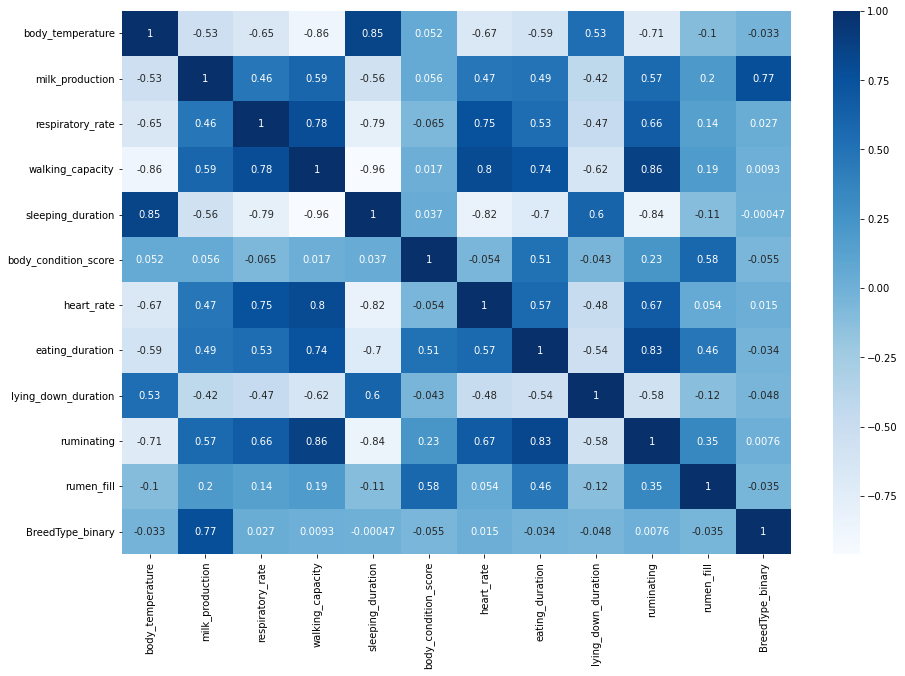

In [170]:
# plotting heatmap using seaborn.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap ="Blues")

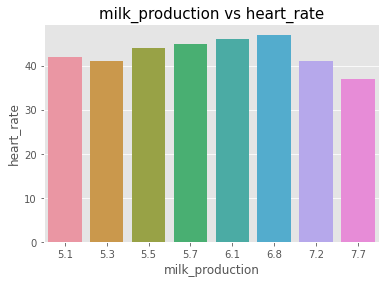

In [172]:
sns.barplot(x="milk_production", y="heart_rate", data=df[170:180])
plt.title("milk_production vs heart_rate",fontsize=15)
plt.xlabel("milk_production")
plt.ylabel("heart_rate")
plt.show()
plt.style.use("ggplot")

# Searching for Outliers and if find any then will remove them.

In [173]:
# Function to creat Diagonostic plots

def plotvariable (df3, variable):
    plt.figure(figsize=(16,4))
    
    #histogram
    
    plt.subplot(1,2,1)
    plt.hist(df3[variable], alpha=0.5)
    
    #boxplot
    
    plt.subplot(1,2,2)
    sns.boxplot(df3[variable])
    
    plt.show()


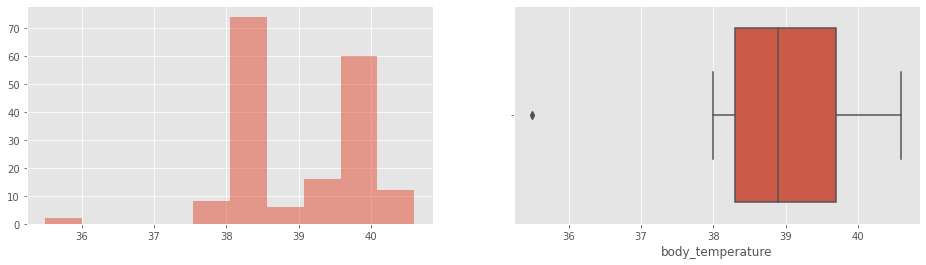

In [174]:
plotvariable(df3, "body_temperature")

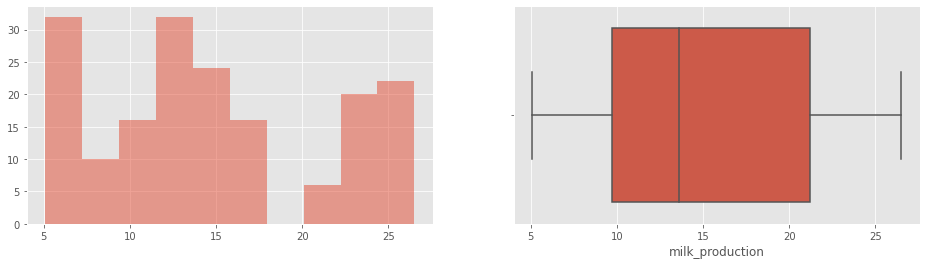

In [175]:
plotvariable(df3, "milk_production")

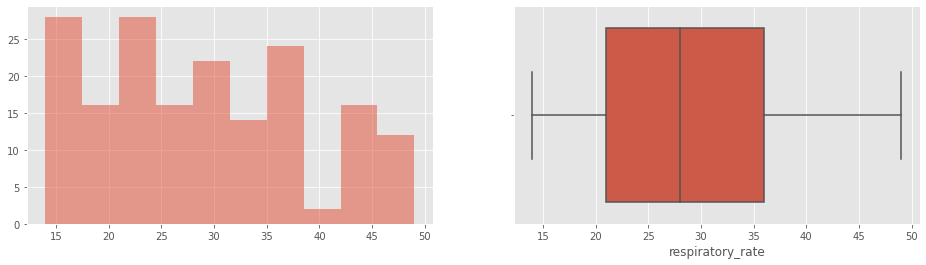

In [176]:
plotvariable(df3, "respiratory_rate")

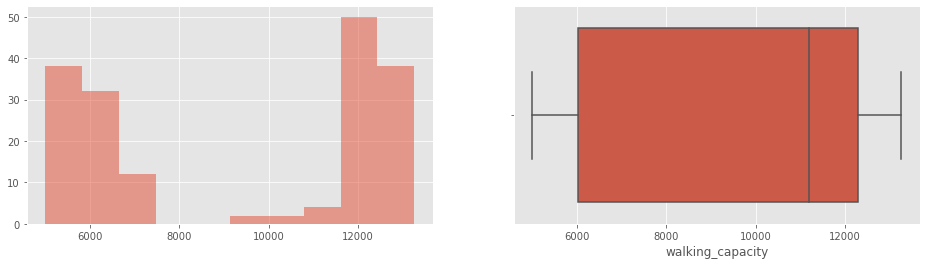

In [177]:
plotvariable(df3, "walking_capacity")

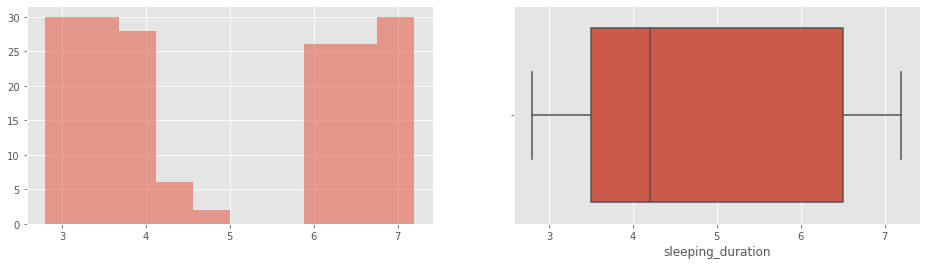

In [178]:
plotvariable(df3, "sleeping_duration")

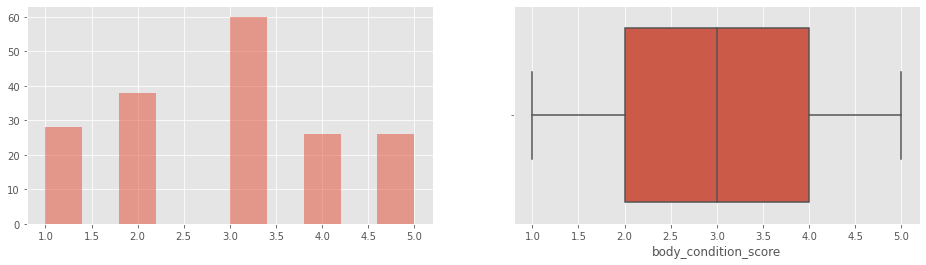

In [179]:
plotvariable(df3, "body_condition_score")

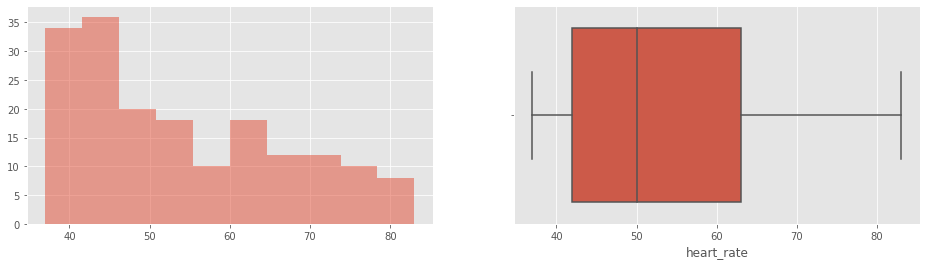

In [180]:
plotvariable(df3, "heart_rate")

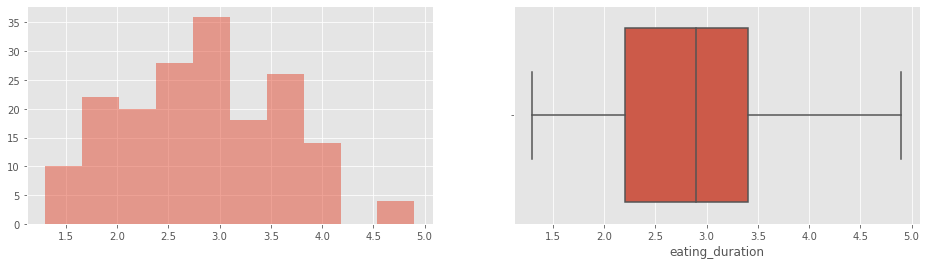

In [181]:
plotvariable(df3, "eating_duration")

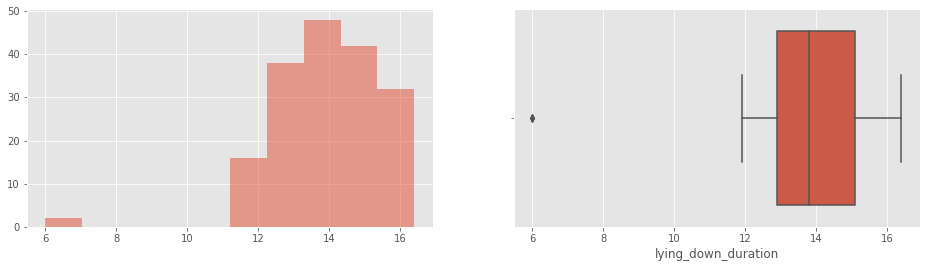

In [182]:
plotvariable(df3, "lying_down_duration")

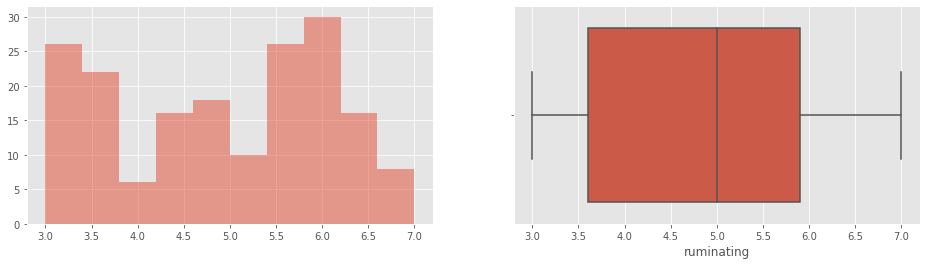

In [183]:
plotvariable(df3, "ruminating")

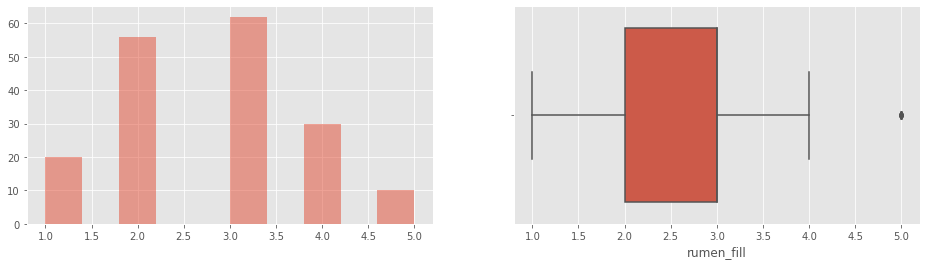

In [184]:
plotvariable(df3, "rumen_fill")

# After searching for outliers we can see there are little outliers in three features. "body_temperature" & "rumen_fill", "lying_down_duration".The amount of outliers is so little. it will not interupt in our model prediction but we will remove them.

In this demo we will follow the IQR approach to filter and deal with outliers. as we know that lower limit for any observation is (Q1- 1.5*IQR) and upper limit is (Q3 + 1.5*IQR)
these terms are as follow:


- Q1 = 25th percentile
- Q3 = 75th percentile
- IQR = Q3- Q1

In [185]:
def find_bounderies(df3, variables):
    Q1 = df3[variables].quantile(.25)
    Q3 = df3[variables].quantile(.75)
    IQR = Q3-Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry, upper_boundry

# Removing Outliers for "rumen_fill"

In [186]:
lower_RumenFill, upper_RumenFill = find_bounderies(df3 , "rumen_fill")
print("upper limit for RumenFill is : " , upper_RumenFill)
print("lower limit for RomenFill is : " , lower_RumenFill)

upper limit for RumenFill is :  4.5
lower limit for RomenFill is :  0.5


In [187]:
outliers_rumenfill = np.where(df3["rumen_fill"] > upper_RumenFill, True,
                              np.where(df3["rumen_fill"] < lower_RumenFill, True,  False))

In [188]:
outliers_rumenfill

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [189]:
df3.shape

(178, 14)

In [190]:
df4 = df3.loc[~(outliers_rumenfill)]
df4.shape

(168, 14)

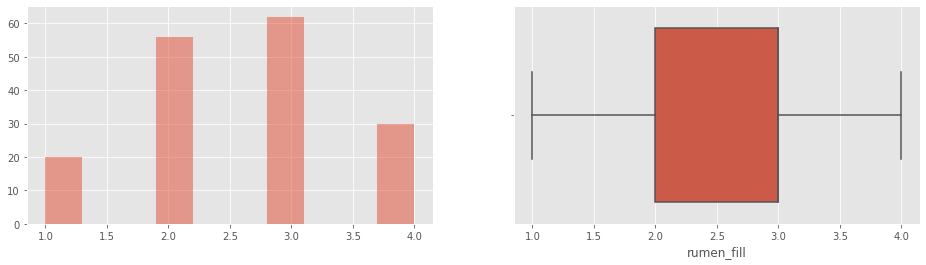

In [191]:
plotvariable(df4, "rumen_fill")

# Removing outliers from "body_temperature".

In [217]:
lower_body_temperature, upper_body_temperature = find_bounderies(df4 , "body_temperature")
print("upper limit for body_temperature is : " , upper_body_temperature)
print("lower limit for body_temperature is : " , lower_body_temperature)

upper limit for body_temperature is :  41.86250000000001
lower limit for body_temperature is :  36.162499999999994


In [218]:
outliers_body_temperature = np.where(df4["body_temperature"] > upper_body_temperature, True,
                              np.where(df4["body_temperature"] < lower_body_temperature, True,  False))

In [219]:
outliers_body_temperature

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [220]:
df4.shape

(168, 14)

In [221]:
df5 = df4.loc[~(outliers_body_temperature)]
df5.shape

(166, 14)

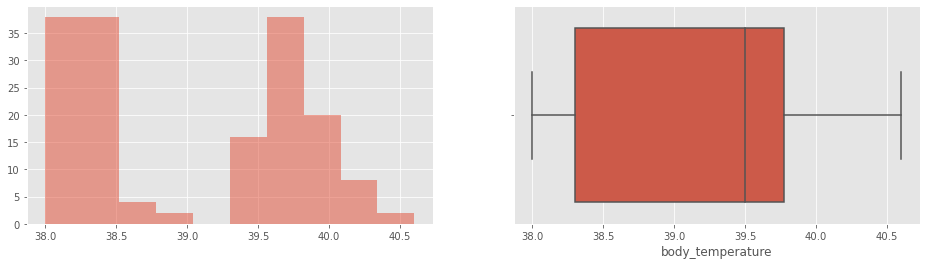

In [222]:
plotvariable(df5, "body_temperature")

# Removing outliers from "lying_down_duration".

In [223]:
lower_lying_down_duration, upper_lying_down_duration = find_bounderies(df5 , "lying_down_duration")
print("upper limit for lying_down_duration is : " , upper_lying_down_duration)
print("lower limit for lying_down_duration is : " , lower_lying_down_duration)

upper limit for lying_down_duration is :  18.362499999999997
lower limit for lying_down_duration is :  9.662500000000001


In [224]:
outliers_lying_down_duration = np.where(df5["lying_down_duration"] > upper_lying_down_duration, True,
                              np.where(df5["lying_down_duration"] < lower_lying_down_duration, True,  False))

In [225]:
outliers_lying_down_duration

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [226]:
df5.shape

(166, 14)

In [227]:
df6 = df5.loc[~(outliers_lying_down_duration)]

df6.shape

(164, 14)

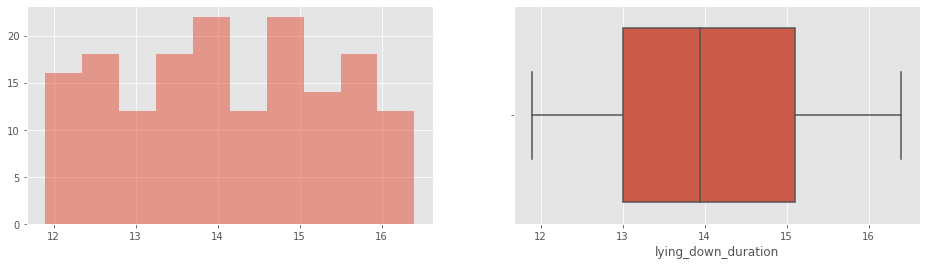

In [228]:
plotvariable(df6, "lying_down_duration")

After removing outliers from these three features, Now our data is outliers free.

# Splitting Training and Testing data.

In [246]:
x = df6.drop(columns = 'Target')
y = df6['Target']

In [247]:
x

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary
0,38.2,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,0,3
1,38.9,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,1,4
2,38.6,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,0,4
3,39.5,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,1,0
5,40.0,10.9,24,9352,3.9,1,60,3.5,12.2,5.5,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,39.9,6.8,28,6942,7.1,4,47,1.9,15.0,3.1,3,0,2
174,40.2,7.2,20,6652,6.5,4,41,2.0,15.5,3.6,4,0,1
175,39.8,7.7,16,6705,6.6,3,37,2.6,14.8,4.2,3,0,3
176,39.5,5.7,21,6272,6.8,3,45,2.2,15.0,3.1,2,0,5


In [248]:
y

0      1
1      0
2      0
3      1
5      1
      ..
173    1
174    1
175    1
176    1
177    1
Name: Target, Length: 164, dtype: int32

In [311]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Scaling the data with MinMaxScaler.

In [312]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [313]:
# scaler.df6_max_

In [314]:
# the scaler stores the standard deviation of the featuring scale

scaler.scale_

array([3.84615385e-01, 4.67289720e-02, 2.85714286e-02, 1.22669284e-04,
       2.27272727e-01, 2.50000000e-01, 2.17391304e-02, 2.77777778e-01,
       2.22222222e-01, 2.63157895e-01, 3.33333333e-01, 1.00000000e+00,
       2.00000000e-01])

As all data are in array form. We will use pandas dataframe to convert them into dataframe.

In [315]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [316]:
x_train_scaled.head()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary
0,0.576923,0.392523,0.028571,0.229146,0.727273,1.00,0.021739,0.388889,0.755556,0.447368,0.666667,1.0,1.0
1,0.192308,0.205607,0.800000,0.870829,0.181818,0.50,0.760870,0.527778,0.377778,0.815789,0.000000,0.0,0.8
2,0.038462,0.322430,0.600000,0.869235,0.045455,0.25,1.000000,0.500000,0.311111,0.684211,0.666667,0.0,0.8
3,0.153846,0.939252,0.628571,0.828999,0.250000,0.75,0.369565,0.611111,0.155556,0.789474,1.000000,1.0,0.8
4,0.000000,0.929907,0.685714,0.879171,0.068182,0.50,0.847826,0.666667,0.311111,0.763158,0.666667,1.0,0.8


In [317]:
np.round(x_train_scaled.describe(), 2)

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,BreedType_binary,FaecalConsistency_binary
count,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.00,131.0,131.00
mean,0.42,0.44,0.39,0.50,0.51,0.46,0.36,0.41,0.50,0.47,0.52,0.5,0.65
std,0.30,0.32,0.27,0.40,0.36,0.32,0.29,0.21,0.28,0.31,0.30,0.5,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
25%,0.12,0.13,0.17,0.11,0.16,0.25,0.11,0.25,0.24,0.16,0.33,0.0,0.40
50%,0.58,0.39,0.34,0.53,0.36,0.50,0.26,0.42,0.51,0.50,0.67,1.0,0.80
75%,0.69,0.75,0.60,0.88,0.86,0.75,0.61,0.56,0.71,0.76,0.67,1.0,0.80
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00


# Building Model on Scaled dataset.

In [318]:
# creating Model

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train_scaled,y_train) 

LogisticRegression()

In [319]:
y_pred_scaled=reg.predict(x_test_scaled)

In [320]:
y_pred_scaled

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [321]:
y_test

159    1
97     0
116    1
8      0
102    0
62     0
149    0
49     0
30     1
48     0
150    0
104    0
145    0
57     0
98     0
132    1
41     1
118    1
110    0
176    1
121    1
152    0
37     1
61     0
160    1
9      0
164    1
60     0
158    1
137    0
66     0
67     0
169    1
Name: Target, dtype: int32

In [322]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

print(classification_report(y_test, y_pred_scaled))
print(confusion_matrix(y_test, y_pred_scaled))
print("Training Score: ",reg.score(x_train_scaled, y_train)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

[[20  0]
 [ 0 13]]
Training Score:  96.94656488549617


In [323]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_scaled})
df7

,Actual,Predicted
159,1,1
97,0,0
116,1,1
8,0,0
102,0,0
62,0,0
149,0,0
49,0,0
30,1,1
48,0,0


In [324]:
print(accuracy_score(y_test, y_pred_scaled)*100)

100.0


In [325]:
# using DecissionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [326]:
y_pred=dtree.predict(x_test_scaled)

In [327]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(x_train_scaled,y_train)*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

[[20  0]
 [ 0 13]]
Training Score:  100.0


In [328]:
print(accuracy_score(y_test,y_pred)*100)

100.0
